# Probability Distribution Notebook


Welcome to this Jupyter notebook! This notebook serves as an example for anyone interested in generating their own probability mass functions (PMF), and cumulative density functions (CDF) and finnaly the generating algorithm for your variables. The great thing about a notebook like this is that you can quickly and accurately create and represent your distributions. . 



## Libraries Used
We use the following Python libraries to make this happen:
- **NumPy**: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python.
- **SciPy**: A free and open-source Python library used for scientific computing and technical computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.



## How to Use
You can use this notebook as a starting point to represent and generate your  PDF, CDF and algorithm that you implemented. All you need to do is input your data and run the cells. Feel free to add your own code and modify it according to your liking and to distributions.

The generating algorithm for your variable is something that we will talk in a future class but it can be done like so:
$$ X=F^{-1}(U)\text{, where }U\in[0,1] $$
You also have the possibility to use a library, if the method is avaliable, like you will se in this notebook.tributions.

Happy coding! 🚀

### We start by downloading the required libraries that will be used in out notebook

In [7]:
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install spyci


Note: you may need to restart the kernel to use updated packages.




### After downloading the libraries we can now import them

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, binom
# from spyci.stats import expon, binom

# Source examples

## Discrete random variable

### Next using the library spicy.stats we will calculate:
- *Mass probability function*
- *Cumulative distribution function*
- *The algorithm to generate our variable*

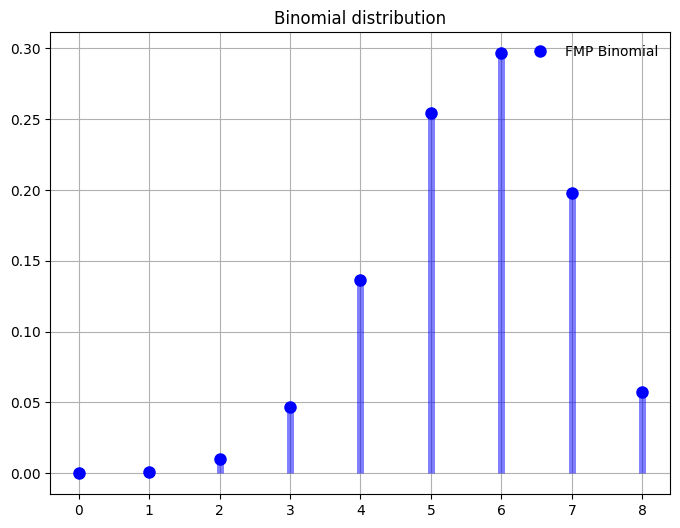

In [14]:
# Figure 
plt.figure(figsize=(8, 6))

# Binomial function parameters
n, p = 8, 0.7

# Display the probability mass function (pmf):
x = np.arange(0, n+1)

# Plot the pmf
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='FMP Binomial')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.title("Binomial distribution")
plt.legend(loc='best', frameon=False)
plt.grid(True)
plt.show()

In [15]:
def binomial_cdf(x, n, p):
    # For x < 0
    if x < 0:
        return 0
    # For 0 <= x <= n
    elif x >= 0 and x <= n:
        cdf = sum([binom.pmf(k, n, p) for k in range(int(x) + 1)])
        return cdf
    # For x > n
    else:
        return 1

In [16]:
for x_value in np.arange(0, 9, 1):
    print(f'F({x_value}) = {np.round(binomial_cdf(x_value, n, p), 3)}')

F(0) = 0.0
F(1) = 0.001
F(2) = 0.011
F(3) = 0.058
F(4) = 0.194
F(5) = 0.448
F(6) = 0.745
F(7) = 0.942
F(8) = 1.0


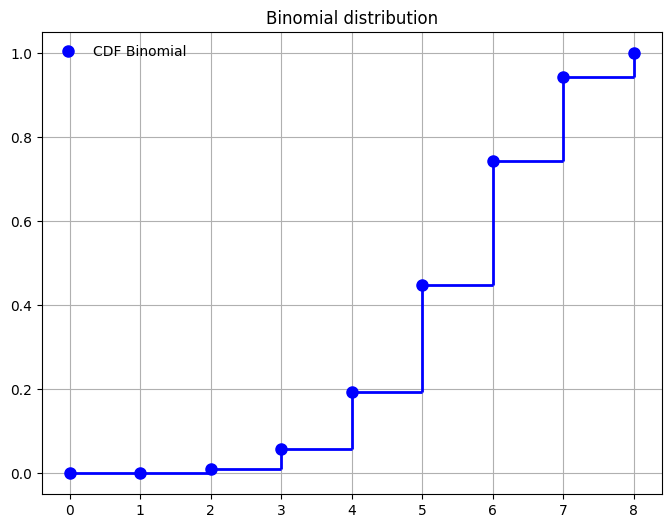

In [17]:
# Generate values for the cumulative distribution function (CDF)
cdf_values = binom.cdf(x, n, p)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, cdf_values, 'bo', ms=8, label='CDF Binomial')
plt.vlines(x[1:], cdf_values[:-1], cdf_values[1:], colors='b', lw=2)
plt.hlines(cdf_values[:-1], x[:-1], x[1:], colors='b', lw=2)
plt.title("Binomial distribution")
plt.legend(loc='best', frameon=False)
plt.grid(True)
plt.show()

In [18]:
def generate_random_number_of_crates(x, n, p):
    # Generate a random variable U in the interval [0, 1]
    U = np.random.uniform(0, 1)
    # Calculate X using the percent point function (PPF, inverse of CDF)
    X = binom.ppf(U, n, p)
    return X

In [19]:
X = generate_random_number_of_crates(x, n, p)
print(f'There are {int(X)} crates to spawn')

There are 7 crates to spawn


## Continuous random variable

### Next using the library spicy.stats we will calculate:
- *Mass probability function*
- *Cumulative distribution function*
- *The algorithm to generate our variable*

Note that this time the algorithm will be calculated using both the formula and the library.


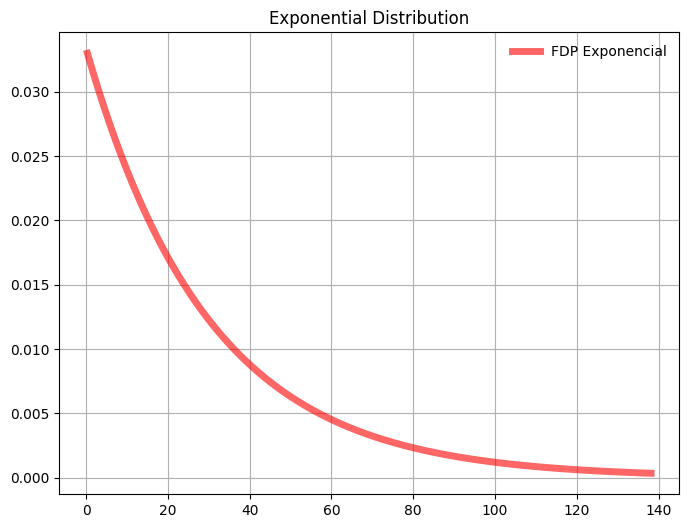

In [20]:
# Define the parameters for the exponential distribution
scale = 30  # This is scale = 1/lambda

# Generate values for x
x = np.linspace(expon.ppf(0.01, scale=scale), expon.ppf(0.99, scale=scale), 100)

# Generate values for the probability density function (pdf)
pdf_values = expon.pdf(x, scale=scale)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, pdf_values, 'r-', lw=5, alpha=0.6, label='FDP Exponencial')
plt.title('Exponential Distribution')
plt.legend(loc='best', frameon=False)
plt.grid(True)
plt.show()

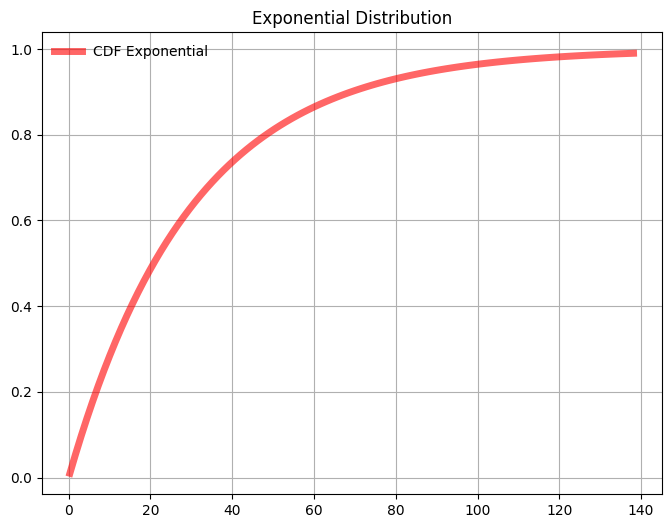

In [21]:
# Generate values for the cumulative distribution function (CDF)
cdf_values = expon.cdf(x, scale=scale)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, cdf_values, 'r-', lw=5, alpha=0.6, label='CDF Exponential')
plt.title('Exponential Distribution')
plt.legend(loc='best', frameon=False)
plt.grid(True)
plt.show()

In [22]:
def generate_random_game_time(scale):
    # Generate a random variable U in the interval [0, 1]
    U = np.random.uniform(0, 1)
    
    #  # Calculate X using the inverse function (calculated manually)
    X = -np.log(1-U)*scale
    # Alternatively you can calculate X using the percent point function
    # (PPF, inverse of CDF, using the library)
    # X = expon.ppf(U, scale=scale)
    return X

In [23]:
val1 = generate_random_game_time(30)
print(f'The round will be {int(np.round(val1))} seconds')

The round will be 6 seconds


# Our variables

## Projectile accuracy/spread (player and enemy)  


- C 2* Normal (x,y)  
- max 10 degrees offset in each direction  
- average 0  
- variance depends on the attack type  



## Prop distribution(Trees, Bushes, ...)


- ### C 2* Uniforme (x,y) to model the center of a tree cluster (bouded by map size)


- ### D 1 distribution to model the amount of tree circles in this cluster.(bouded between 1 and a fixed number (maybe 3?)


- ### C 1 distribution to model the angle (relative to the cluster origin) of the tree to spawn.


- ### C 1 normal distribution to model the distance (relative to the cluster origin) of the tree to spawn.


- ### D 1 uniform distribution to decide which tree circle to spawn the tree onto.

## Enemy movement

- C Normal between -20 and 20. 
- Represents the degrees from the direction of the player that the enemy will walk towards.
- Walks at a constant speed.



## Enemy actions/attacks


- D Custom discrete VA

## Light source/Time of day


- Optional. May be either C or D.

## Dynamic obstacles (“vines”)


- C Normal between -45 and 45.
- Represents the degrees from the direction of the player that the vine will grow into.
- Grows at constant speed.

## Probability of placing special trap


- D Binomial